In [2]:
using DataFrames, CSV, Plots, Distributions

INFO: Recompiling stale cache file /Users/pocucan/.julia/lib/v0.6/TranscodingStreams.ji for module TranscodingStreams.
INFO: Recompiling stale cache file /Users/pocucan/.julia/lib/v0.6/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /Users/pocucan/.julia/lib/v0.6/CSV.ji for module CSV.
INFO: Recompiling stale cache file /Users/pocucan/.julia/lib/v0.6/Colors.ji for module Colors.
INFO: Recompiling stale cache file /Users/pocucan/.julia/lib/v0.6/Plots.ji for module Plots.
INFO: Recompiling stale cache file /Users/pocucan/.julia/lib/v0.6/SpecialFunctions.ji for module SpecialFunctions.
INFO: Recompiling stale cache file /Users/pocucan/.julia/lib/v0.6/Distributions.ji for module Distributions.


In [2]:
# This is the iris dataset cool, reading it in seems to be pretty easy. Let me try somehing else 
iris = CSV.read(joinpath(Pkg.dir("DataFrames"), "test/data/iris.csv"));
#Trying something else. 
#test = CSV.read("test.csv")
# it works 

In [3]:
# Lets do some basic stats on this dataset. 
#head(iris)
# Lets calculate an average and sd. 
sepLength = iris[:SepalLength]
print("mean is this\n")
print(mean(sepLength))
print("\nVariance is:\n")
print(var(sepLength))
print("\nstd is: ")
print(std(sepLength))

mean is this
5.843333333333335
Variance is:
0.6856935123042505
std is: 0.8280661279778629

In [4]:
test = [2,4]
test.^2 - 10
# similar syntax to matlab 

2-element Array{Int64,1}:
 -6
  6

In [5]:
# lets calculate some primes. 
function getPrimes(n)
    primes = []
    for i = 2:n
        if any(x->x==0,rem.(i,primes))
        else
            append!(primes,i)
        end    
    end
    primes
end

getPrimes (generic function with 1 method)

In [6]:
getPrimes(10000);
#alright cool I can create functions. 


In [3]:
# load plots. 
using Plots

In [6]:
# Lets try make some higher order functions

function f1(x)
    x + 2
end

function f2(x)
    x.^2
end

function f3(x)
    x.^2 + 3
end

# need to figure out this part, need to plot multiple functions ontop of one another. 

function fillPlot(data, fxns)
    fxnDat = []
    for i = 1:length(fxns)
        push!(fxnDat,fxns[i](data))
    end
end

fillPlot (generic function with 1 method)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sin(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/pocucan/.julia/v0.6/IJulia/src/execute_request.jl:158
 [5] (::Compat.#inner#18{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/pocucan/.julia/v0.6/Compat/src/Compat.jl:378
 [6] eventloop(::ZMQ.Socket) at /Users/pocucan/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[57], in expression starting on line 4
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/pocucan/.juli

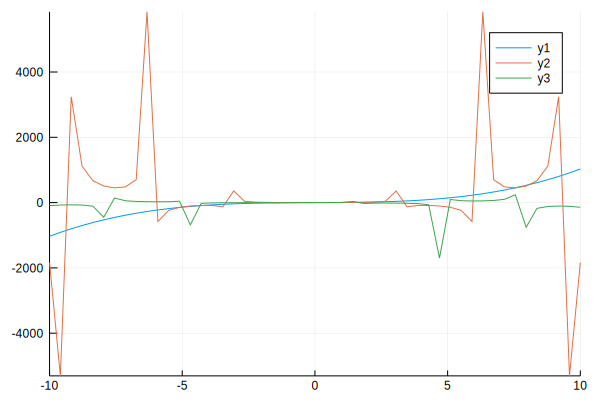

In [57]:
x = linspace(-10,10)
y = map(f3,x)
plot(x,x.*y)
plot!(x,x./sin(x).*map(f2,x))
plot!(x,x./cos(x).*map(f1,x))

In [2]:
using LaTeXStrings

In [20]:
# CONSTRUCTORS
RedApple = Apple("red","nice")

Apple("red", "nice")

In [21]:
RedApple.taste

"nice"

In [58]:
L"1 + \alpha"

L"$1 + \alpha$"

In [78]:
IFrame(600, 200, "https://ms.mcmaster.ca/mirc/clusterplot")

LoadError: [91mUndefVarError: IFrame not defined[39m

In [9]:
# Some example of notes . 
L"\text{This is an example of a latex note} "
L"\frac{\partial\mathcal{L}_{SE}}{\partial z} = \frac{\partial\mathcal{L}_{SE}}{\partial y} \frac{\partial y}{\partial z}"


L"$\frac{\partial\mathcal{L}_{SE}}{\partial z} = \frac{\partial\mathcal{L}_{SE}}{\partial y} \frac{\partial y}{\partial z}$"

In [35]:
function sigmoid(x)
      return 1.0 ./ (1.0 .+ exp.(-x))
end

sigmoid (generic function with 1 method)

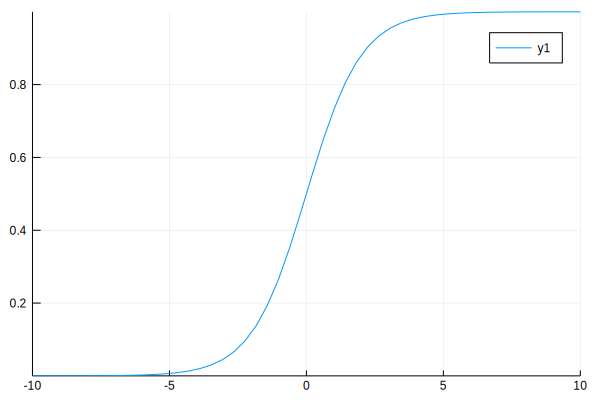

In [36]:
x = linspace(-10,10)
plot(x,sigmoid(x))

In [11]:
# Lets create vector calculus structor. 

struct Point{T<:Real}
           x::T
           y::T
end

function doPoint(f, p1,p2)
    p3 = Point(map(f,p1.x,p2.x),map(f,p1.y,p2.y))
end
# okay cool I can create general methods 
function addPoints(p1, p2)
    p3 = Point(p1.x+ p2.x, p1.y + p2.y)
end

addPoints (generic function with 1 method)

In [16]:
xA = Point(0,1);
xB = Point(0,2);
println(addPoints(xA,xB))
println(doPoint(*,xA,xB))

Point{Int64}(0, 3)
Point{Int64}(0, 2)


In [1]:
# Parrallel Portion of it. 
a() = det(rand(1000, 1000));
b = Task(a)



Task (runnable) @0x0000000122b40b50

In [2]:
istaskdone(b)

false

In [3]:
schedule(b)

Task (done) @0x0000000122b40b50

In [5]:
yield()

In [1]:
# they got a lot of distributions, pretty cool. 
histogram(rand(Arcsine(-10,10),10000))
histogram!(rand(Normal(0,4),10000))
histogram!(rand(Poisson(0.5),10000))
histogram(rand(GeneralizedExtremeValue(0, 3, 3),100))

LoadError: [91mUndefVarError: histogram not defined[39m

In [75]:
# Functions in julia. 
function add(x,y)
    println("$x + $y = $(x+y)")
    x + y
end

# lets try return statements. 
function returnadd(x,y)
    println("return the addition of $x + $y")
    return  x + y
end

# you define optionals like so . 
function optionalAdd(x,y,z=0)
   println("this is an optional add $x + $y + $z = $(x+y+z)") 
end

# let me re-assign some functions 
function pln(x)
    println(x)
end

#defining functions that take keyword types. 
function keywordAdd(;first = 0 ,second = 0 )
    first + second 
end

# First class functions, now create a function that creates a function .
function createadder(x)
    function adder(y)
        return x + y
    end
    adder
end

3-element Array{Int64,1}:
 11
 12
 13

In [78]:
add(2,3); 
returnadd(2,3); 
optionalAdd(1,2,5); 
pln("This is a test to see something $(1+2)")
pln(30 + 15); 
pln(keywordAdd(first= 2,second = 10))
createadder(5)(2) #first bracket arg is x, second bracket arg is y. 
# There are built in high-order functions like filter. 
filter(x -> x + 1 > 2,[0,1,2,3] )

2 + 3 = 5
return the addition of 2 + 3
this is an optional add 1 + 2 + 5 = 8
This is a test to see something 3
45
12


2-element Array{Int64,1}:
 2
 3

In [3]:
# okay lets try a simple mathematical problem. 

# given a string of n bits, either 1 or 0 randomely, 
# a turn consists of either turning 101 -> 111 or 
# 010 to 000. The question is what happens to the string? 

# lets create a function that takes in strings of 3 and then 
# returns the string we need. 
function pln(x) println(x) end 

function turnOnes(s)
    if s == "101"
        return "111"
    elseif s == "010"
        return "000"
    elseif s == "111"
        return "000"
    elseif s == "110"
        return "111"
    elseif s == "100"
        return "000"
    elseif s == "001"
        return "000"
    elseif s == "011"
        return "111"
    else
        return s 
    end
end 

# need to change this one with a switch statement lol. 

# lets test this out shall we. 
pln(turnOnes("101"))
pln(turnOnes("010"))
pln(turnOnes("001"))
pln(turnOnes("100"))
pln(turnOnes("111"))
pln(turnOnes("000"))
# okay great, all 3! cases work. 

# this one took a while 
function genString(n)
   reduce(*,map(x-> string(x),rand([0,1],n)))
end

# pick 3 chars in the string randomely. 
function selectRandomely(s)
    anchor = rand(1:length(s))  
    if anchor == 1
        return s[1:3],1,3
    elseif anchor == length(s)
        return s[end-2:end], anchor-2, anchor
    elseif anchor == (length(s) - 1)
        return s[(anchor-1):(anchor+1)],anchor-1,anchor+1
    else
        return s[anchor:anchor+2],anchor,anchor+2
    end
end


function beginFlips(s,n=10000)
    #pln("The beginning string is $s")
    for i = 1:100
        sR = selectRandomely(s)
        sA = split(s,"")
        sA[sR[2]:sR[3]] = split(turnOnes(sR[1]),"")
        s = reduce(*,sA)
       # pln(s)
        if s == reduce(*,map(x->string(Int(x)), zeros(length(s))))
            return(i)
            break 
        end
    end
   pln(s); return -10
end

111
000
000
000
000
000


beginFlips (generic function with 2 methods)

In [8]:
function genData(x)
    data = []
    for i = 1:1000
        breaker = beginFlips(genString(x))
        push!(data,breaker)
    end
    return data
end

genData (generic function with 1 method)

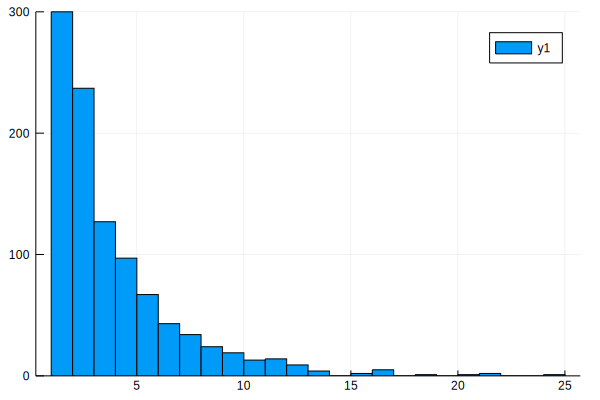

In [9]:
histogram(genData(4),bins=40) # looks like a gamma distribution. 

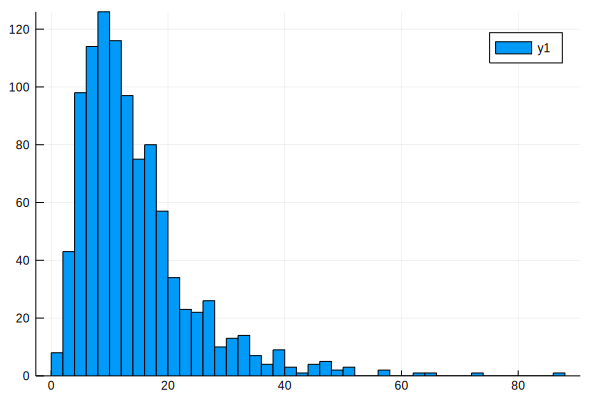

In [10]:
histogram(genData(10),bins=40)  # gamma with different shape parameter

10000000000000000000
10000000000000000000
10000000000000000000
10000000000000000000
10000000000000000000


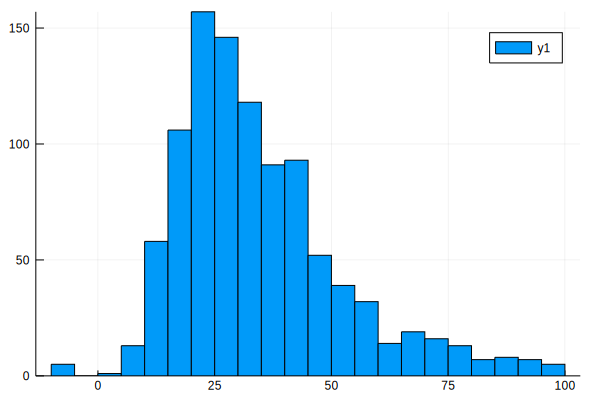

In [11]:
histogram(genData(20),bins=40)  #Gamma with a larger shape parameter

000000000000000010000000000000
100000000000000000000000000000
100000000000000000000000000000
000000000000000110000000000000
000000000000000011110000000000
000000011100000000000000000000
000000000000100010000000000000
000000000000100000000000000000
000000000000000000000010000000
000111100000000000000000000000
000000000000000000000100000000
100000000000000000000000000000
100000000000000000000000000000
000000000011110000000000000000
110000000000000011100000000000
100000000000000000000000000000
100000000000000000000000000000
111100000000000000000000000000
100000000000000000000000000000
100000000000000000000000000000
000010000000000000000000000000
100000000000000000000000000000
100000000000000000000000000000
000000000000000000000011100000
000000000000000000000000001000
100000000000000000000000000000
100000000000000000000000000000
000000000000000000011000000000
000000000000000000001100000000
111110000000000000000000000000
000000000000000000001000000000
000000000000000000100000111000
10000000

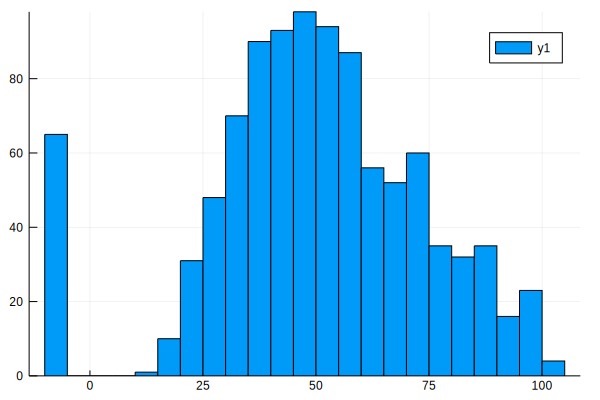

In [12]:
histogram(genData(30),bins=40)  # big shape parameter. ignore output text. 